In [3]:
import pickle
from utils import neuron_finding
import numpy as np

def read_pickle_file_to_get_weighted_activation(file_name):
    f = open(file_name,"rb")
    data = pickle.load(f) #[weights, max_activations, mean_activations]
    f.close()

    weights = data[:,:,0]
    activations =data[:,:,1]
    weighted_activations = np.where((weights > 0) & (activations > 0), 
                        weights * activations, 
                        -(np.abs(weights) * np.abs(activations)))
    # weighted_activations = np.array(result)

    sample_number =weighted_activations.shape[0]
    if np.ndim(weighted_activations) == 2:
        average_gradients = np.sum(weighted_activations, axis=0)
    elif np.ndim(weighted_activations) ==1:
        weight_accumulator = weighted_activations
        average_gradients = weight_accumulator / sample_number

    # 估计每个卷积核的Shapley值
    importance = average_gradients.flatten()
    # weighted_activation = weights*activation
    
    return importance



384


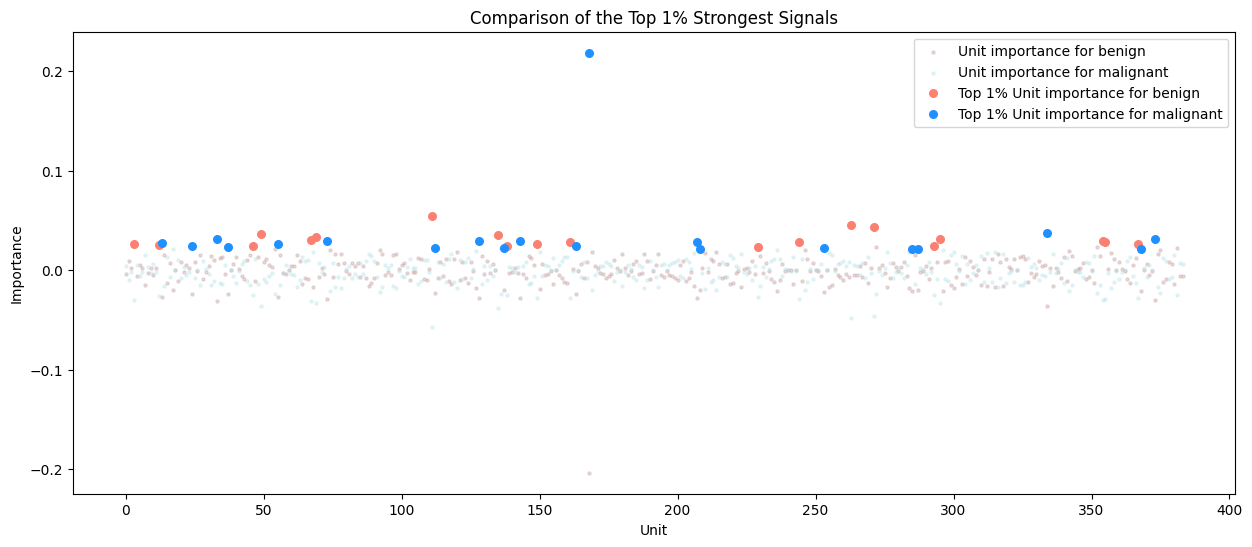

In [9]:
import numpy as np
import matplotlib.pyplot as plt

data1 = read_pickle_file_to_get_weighted_activation("activs_stats/thyroid_thyroid_vit_small_last_block//0.pkl")
print(len(data1))
data2 = read_pickle_file_to_get_weighted_activation("activs_stats/thyroid_thyroid_vit_small_last_block//1.pkl")
# 计算每组数据的前10%的强度值的阈值
threshold1 = np.percentile(data1, 95)
threshold2 = np.percentile(data2, 95)

# 找出每组数据中前10%的值的位置
top_10_percent_indices1 = np.where(data1 > threshold1)[0]
top_10_percent_indices2 = np.where(data2 > threshold2)[0]
import matplotlib.pyplot as plt
import numpy as np

# 假设data1和data2已经被加载，并且阈值计算完成
# ...
# 设置更高的透明度以及更小的点大小
alpha_val = 0.7
dot_size = 5

# 设置突出显示点的颜色
highlight_color1 = 'salmon'  # 这里替换为图中的实际红色
highlight_color2 = 'dodgerblue'  # 这里替换为图中的实际蓝色
plt.style.use('default')
# 为了在散点图上区分所有点和前1%的点，我们用不同的颜色和大小来标记它们
plt.figure(figsize=(15, 6))

# 绘制所有点，使用较小的点和更高的透明度
plt.scatter(range(384), data1, label='Unit importance for benign',alpha=0.3, color='rosybrown', s=dot_size)
plt.scatter(range(384), data2, label='Unit importance for malignant',alpha=0.3,  color='powderblue', s=dot_size)

# 突出显示前1%的点，使用相同色的描边
plt.scatter(top_10_percent_indices1, data1[top_10_percent_indices1], color=highlight_color1, 
            label='Top 1% Unit importance for benign', edgecolor=highlight_color1, s=30)
plt.scatter(top_10_percent_indices2, data2[top_10_percent_indices2], color=highlight_color2, 
            label='Top 1% Unit importance for malignant', edgecolor=highlight_color2, s=30)

# 标注图表
plt.title('Comparison of the Top 1% Strongest Signals')
plt.xlabel('Unit')
plt.ylabel('Importance')
plt.legend()

# 确保网格被关闭
plt.grid(False)

# 显示图表
plt.show()

In [ ]:
! pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 182.0 kB/s eta 0:00:00a 0:00:01


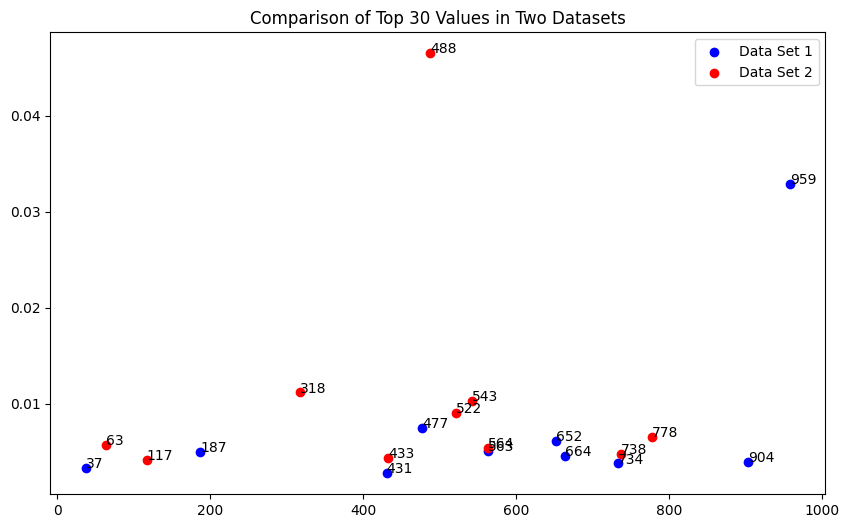

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 假设data1和data2是您的两组n维数据
# data1 = np.random.rand(1024)
# data2 = np.random.rand(1024)

# 获取每组数据的前30个最强信号的位置和值
top_30_data1 = np.argsort(data1)[-30:]
top_30_data2 = np.argsort(data2)[-30:]

# 创建图表
plt.figure(figsize=(10, 6))

# 绘制数据点
plt.scatter(top_30_data1, data1[top_30_data1], color='blue', label='Data Set 1')
plt.scatter(top_30_data2, data2[top_30_data2], color='red', label='Data Set 2')

# 可选：连接前30的点，使位置变化更明显
for i, txt in enumerate(top_30_data1):
    plt.annotate(txt, (top_30_data1[i], data1[top_30_data1[i]]))

for i, txt in enumerate(top_30_data2):
    plt.annotate(txt, (top_30_data2[i], data2[top_30_data2[i]]))

# 添加标题和图例
plt.title('Comparison of Top 30 Values in Two Datasets')
plt.legend()
plt.show()


In [ ]:
! pip install matplotlib-venn

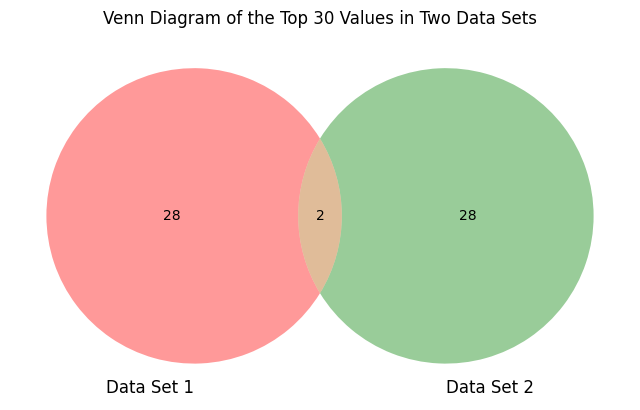

In [ ]:
from matplotlib_venn import venn2
# 找出每组数据中前30个最大值的索引
top_30_indices_data1 = set(np.argsort(data1)[-30:])
top_30_indices_data2 = set(np.argsort(data2)[-30:])

# 使用这两个索引集合来创建Venn图
plt.figure(figsize=(8, 8))
venn2([top_30_indices_data1, top_30_indices_data2], ('Data Set 1', 'Data Set 2'))
plt.title('Venn Diagram of the Top 30 Values in Two Data Sets')
plt.show()